In [9]:
# PANDAS IS FOR DATA WRANGLING
import pandas as pd
import numpy as np

# SEABORN IS A PLOTTING LIBRARY
import seaborn as sns

# MATPLOT LIB IS ALSO A PLOTTING LIBRARY
import matplotlib.pyplot as plt

# SKLEARN IS OUR MACHINE LEARNING PACKAGE
from sklearn.linear_model import LinearRegression

# IMPORT OUR RANDOM FOREST REGERSSOR
from sklearn.ensemble import RandomForestRegressor

# METRICS HELP US SCORE OUR MODEL
from sklearn import metrics

# HELP US SPLIT OUR DATA INTO TESTING A TRAINING
from sklearn.model_selection import train_test_split

# Good ol statsmodels
import statsmodels.api as sm

# Specific root mean squared error for stats models
from statsmodels.tools.eval_measures import rmse
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import qqplot


In [10]:
df = pd.read_csv('Sleep_Data_Sampled.csv')
print(f"Dataset size: {df.shape}") 

Dataset size: (15000, 13)


In [11]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,35,Doctor,6.65,7,50,7,Normal Weight,120/80,71,7100,Healthy
1,2,Male,42,Teacher,6.90,8,52,4,Normal,135/90,66,7000,Healthy
2,3,Male,34,Software Engineer,6.95,7,66,6,Overweight,126/83,74,6100,Healthy
3,4,Male,32,Doctor,6.90,6,52,7,Normal,120/80,71,6500,Healthy
4,5,Male,37,Lawyer,6.85,7,60,6,Normal,125/80,71,6500,Healthy


In [12]:
# Features and Target
X = df[['Sleep Duration', 'Stress Level', 'Age', 'Heart Rate',
        'Physical Activity Level', 'Daily Steps']]
y = df['Quality of Sleep']

# Split into Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
 
# Train the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


LinearRegression()

In [14]:
# Predictions
y_pred_lr = linear_model.predict(X_test)

# Evaluate Linear Regression
print("Linear Regression Results:")
print(f"R²: {metrics.r2_score(y_test, y_pred_lr):.2f}")
print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)):.2f}")


Linear Regression Results:
R²: 0.84
RMSE: 0.42


In [14]:
# Check sizes of training and testing data
print(f"Total rows in the dataset: {len(df)}")
print(f"Rows in training set: {len(X_train)}")
print(f"Rows in testing set: {len(X_test)}")


Total rows in the dataset: 15000
Rows in training set: 12000
Rows in testing set: 3000


In [15]:
# Coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': linear_model.coef_
})
print(coefficients)


                   Feature  Coefficient
0           Sleep Duration     0.991015
1             Stress Level    -0.212786
2                      Age     0.016447
3               Heart Rate    -0.017346
4  Physical Activity Level     0.003186
5              Daily Steps     0.000138


Random Forest Regression

In [16]:
# Train the model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [28]:
# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest Regression
print("\nRandom Forest Results:")
print(f"R²: {metrics.r2_score(y_test, y_pred_rf):.2f}")
print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)):.2f}")



Random Forest Results:
R²: 1.00
RMSE: 0.06


In [17]:
# Feature Importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("\nFeature Importances:")
print(feature_importances)



Feature Importances:
                   Feature  Importance
0           Sleep Duration    0.776071
1             Stress Level    0.088802
3               Heart Rate    0.047287
2                      Age    0.038799
4  Physical Activity Level    0.028911
5              Daily Steps    0.020130


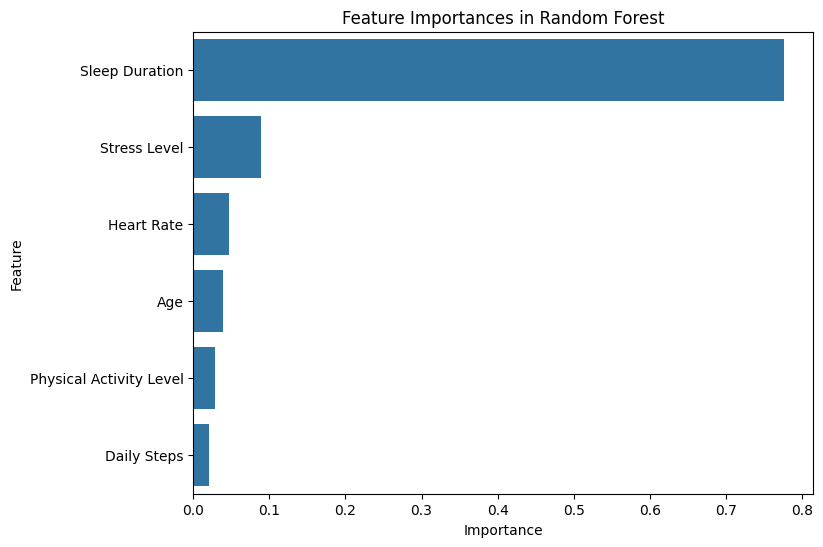

In [18]:
# Visualize Feature Importances
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances in Random Forest')
plt.show()


In [19]:
# Custom Input for Testing
user_input = {
    'Sleep Duration': float(input("Enter Sleep Duration (e.g., 7.5): ")),
    'Stress Level': int(input("Enter Stress Level (1-10): ")),
    'Age': int(input("Enter Age (e.g., 30): ")),
    'Heart Rate': int(input("Enter Heart Rate (e.g., 72): ")),
    'Physical Activity Level': int(input("Enter Physical Activity Level (1-5): ")),
    'Daily Steps': int(input("Enter Daily Steps (e.g., 5000): "))
}



# Convert to DataFrame
user_input_df = pd.DataFrame([user_input])  # Single row DataFrame
print(user_input_df)
# Linear Regression Prediction
pred_lr = linear_model.predict(user_input_df)
print(f"Linear Regression Prediction for Quality of Sleep: {pred_lr[0]:.2f}")

# Random Forest Prediction
pred_rf = rf_model.predict(user_input_df)
print(f"Random Forest Prediction for Quality of Sleep: {pred_rf[0]:.2f}")
print("Linear Model Features:", linear_model.coef_)
print("Random Forest Features:", rf_model.feature_importances_)



   Sleep Duration  Stress Level  Age  Heart Rate  Physical Activity Level  \
0             6.7             5   34          70                        4   

   Daily Steps  
0         9000  
Linear Regression Prediction for Quality of Sleep: 6.95
Random Forest Prediction for Quality of Sleep: 8.00
Linear Model Features: [ 9.91014652e-01 -2.12785644e-01  1.64469924e-02 -1.73461645e-02
  3.18626246e-03  1.38019809e-04]
Random Forest Features: [0.77607096 0.08880181 0.03879924 0.04728736 0.028911   0.02012963]
